# Pairs Trading Algorithm

Done by :-
* Arjun Angirishi 20112023
* Aryan Chaturvedi 20112024
* Abhay Singh 2011500

Under Assistant Prof Sumit Kumar Yadav

##### For further details , the project report can be referred.

In [1]:
#installing necessary yfinance library for importing the stock data
!pip install -q yfinance


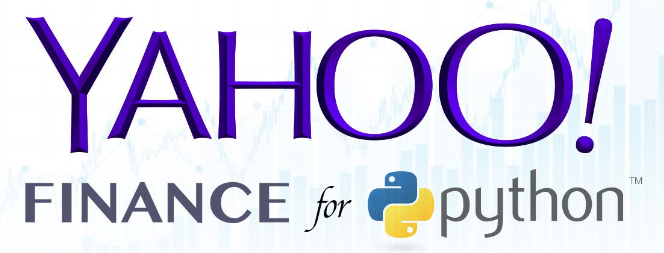




yfinance is a popular open source library developed by Ran Aroussi as a means to access the financial data available on Yahoo Finance. Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies.

In [2]:
# Reading the csv file containing top 500 companies on nifty. The file can be founded on https://www.nseindia.com/products-services/indices-nifty500-index

import pandas as pd
nse500=pd.read_csv('ind_nifty500list.csv')

In [3]:
# Here is the list of companies along with some additional information such as the Industry to which they belong, their symbol etc.
nse500

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027
499,Zydus Wellness Ltd.,Fast Moving Consumer Goods,ZYDUSWELL,EQ,INE768C01010


<AxesSubplot:ylabel='Industry'>

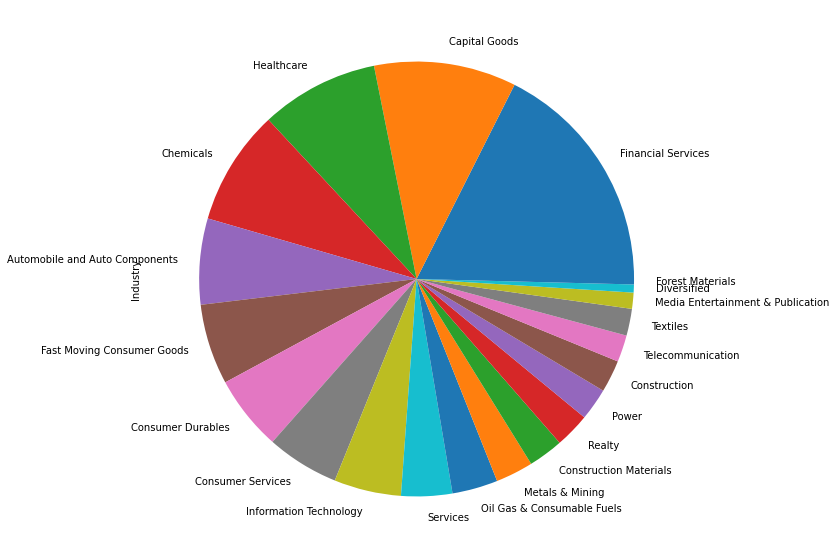

In [4]:
# Analysing the number of companies from each Industry.
nse500['Industry'].value_counts().plot.pie(figsize=(10,10))

Clearly the maximum companies belong to financial services, followed by Capital goods, Healthcare , Chemicals , Automobiles and FMCG.

In [5]:
# Downloading the other necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

In [6]:
# Creating a list of nifty 500 companies symbols to import their data from yfinance.
# .NS is added to indicate to yfinance that we are importing NSE data
list_of_stocks=[]
for i in range(len(nse500)):
  list_of_stocks.append(nse500['Symbol'][i] + '.NS')

In [7]:
list_of_stocks

['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'ADANITRANS.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AEGISCHEM.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'AMARAJABAT.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ACI.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BASF.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'MAHABANK.NS',
 'BATAINDIA.NS',
 'BAYERCROP.NS',
 'BER

We will be analysing the pre COVID data so that no anamoly is introduced due to major external adverse factors.

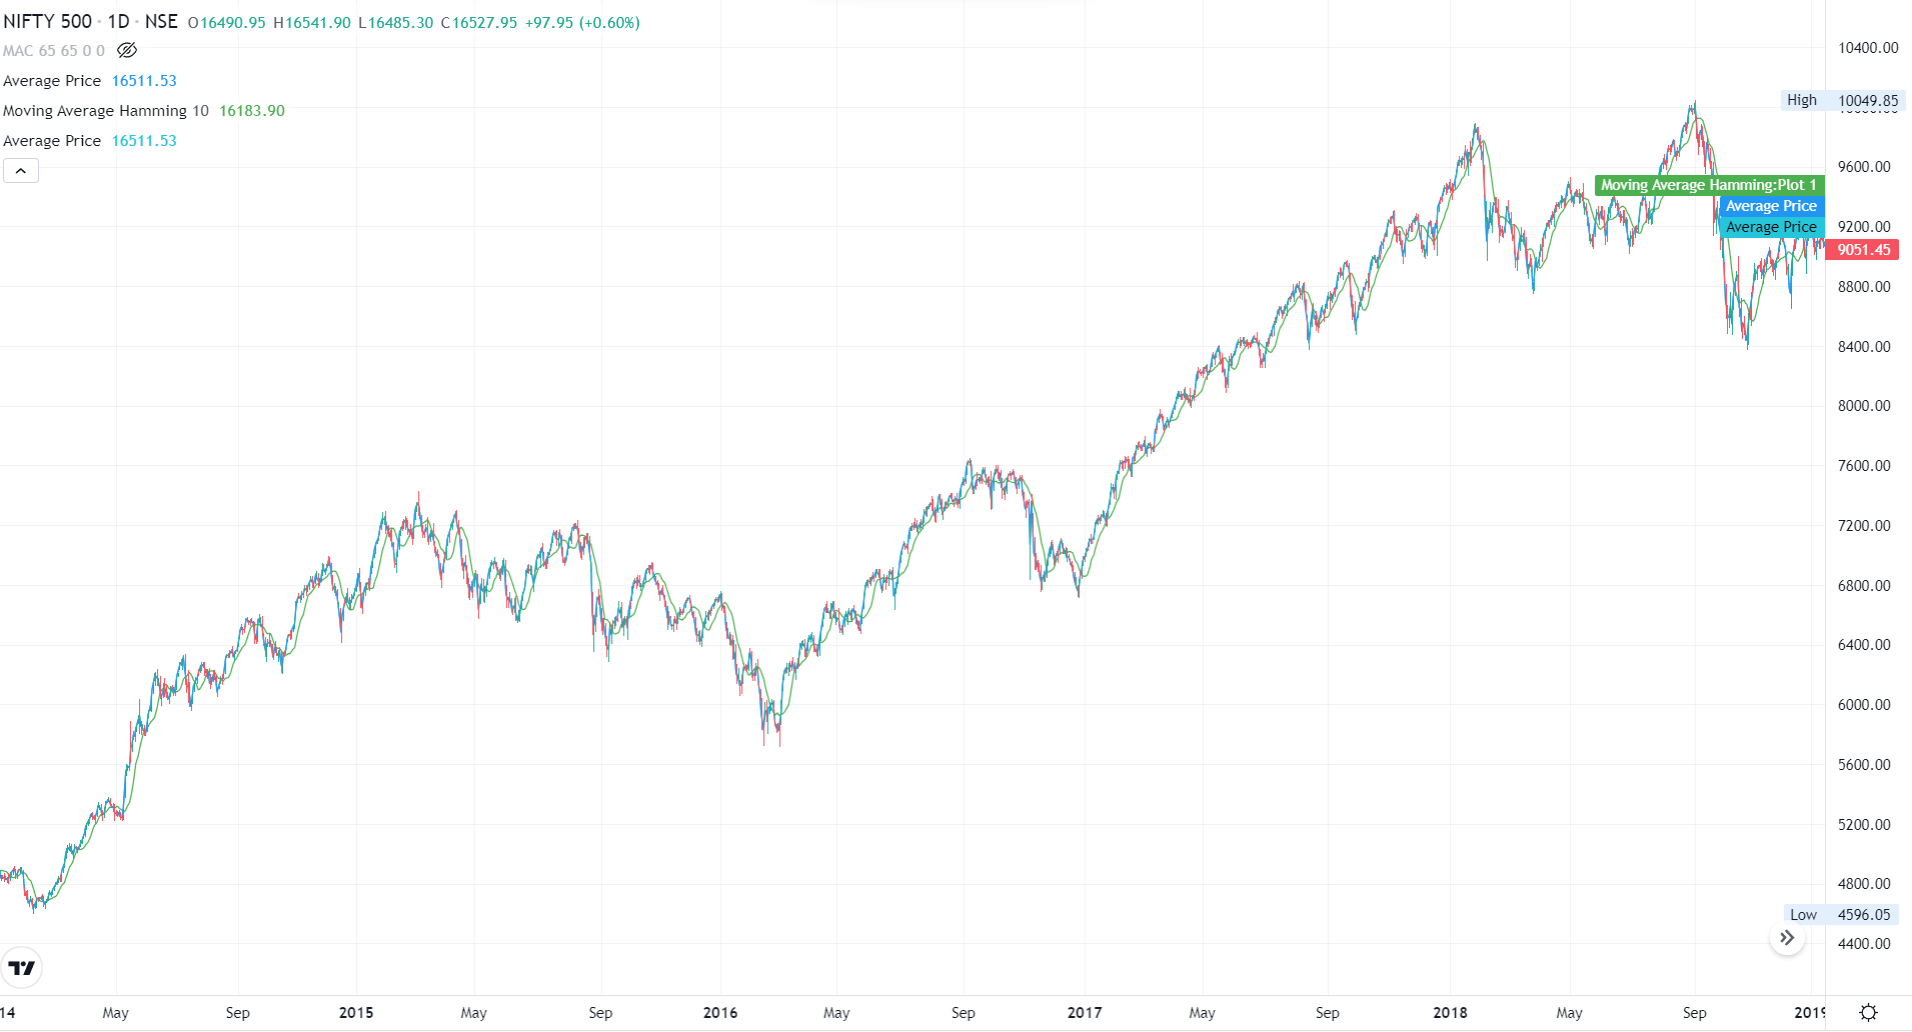

In [8]:
# Data to be extracted is taken from 2014 to 2019
start_date = datetime(2014,1,1)
end_date = datetime(2019,1,1)


In [9]:
#downloading the data

from pandas_datareader import data as pdr
stocks_data=[]

for i in list_of_stocks:
  stock=pdr.DataReader(i,start=start_date,end=end_date)
  if len(stock)>0:
    stocks_data.append(stock)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 360ONE.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CHALET.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CHEMPLASTS.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CLEAN.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HLEGLAS.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HAPPSTMNDS.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LATENTVIEW.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LXCHEM.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LICI.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RVNL.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RAINBOW.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%**************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MANYAVAR.NS: Data doesn't exist for startDate = 1388514600, endDate = 1546281000
[*********************100%***********************]  1 of 1 completed


In [10]:
stocks_data

[                    Open          High           Low         Close  \
 Date                                                                 
 2014-01-01   3696.899902   3696.899902   3626.000000   3630.800049   
 2014-01-02   3660.000000   3660.000000   3600.000000   3605.899902   
 2014-01-03   3575.550049   3642.000000   3575.550049   3639.000000   
 2014-01-06   3605.050049   3617.949951   3515.000000   3534.899902   
 2014-01-07   3515.000000   3780.000000   3515.000000   3740.000000   
 ...                  ...           ...           ...           ...   
 2018-12-24  22060.000000  22060.000000  21490.000000  21535.150391   
 2018-12-26  20800.000000  20800.000000  19644.000000  20597.550781   
 2018-12-27  20930.000000  20997.400391  20150.000000  20258.699219   
 2018-12-28  20499.949219  21178.000000  20330.849609  20974.099609   
 2018-12-31  21298.099609  21298.099609  20750.000000  20824.400391   
 
                Adj Close  Volume  
 Date                              
 20

In [11]:
len(stocks_data)

415

In [12]:
stocks_data[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,3696.899902,3696.899902,3626.000000,3630.800049,3503.880615,149
2014-01-02,3660.000000,3660.000000,3600.000000,3605.899902,3479.850830,622
2014-01-03,3575.550049,3642.000000,3575.550049,3639.000000,3511.793945,158
2014-01-06,3605.050049,3617.949951,3515.000000,3534.899902,3411.332764,1590
2014-01-07,3515.000000,3780.000000,3515.000000,3740.000000,3609.263184,1044
...,...,...,...,...,...,...
2018-12-24,22060.000000,22060.000000,21490.000000,21535.150391,20782.361328,1158
2018-12-26,20800.000000,20800.000000,19644.000000,20597.550781,19877.535156,18652
2018-12-27,20930.000000,20997.400391,20150.000000,20258.699219,19550.529297,2164


In [13]:
# taking data from 2014 to 2017 as training data and data after 2017 as test data

date_division=datetime(2017,1,1)

stocks_data_training=pd.DataFrame(index=stocks_data[0][:date_division].index)
stocks_data_testing=pd.DataFrame(index=stocks_data[0][date_division:].index)

In [14]:
list_of_stocks_available=[]

In [15]:
# Ignoring superflous warnings
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [16]:
#This step is performed so that companies with fragmented data on yfinance library can be removed
#Analysing the Close price of the day
 

for i in range(len(stocks_data)):
  if len(stocks_data[i])==len(stocks_data[1]):
    stocks_data_training['Adj Close '+ list_of_stocks[i]]=stocks_data[i]['Adj Close'][:date_division]
    stocks_data_testing['Adj Close '+ list_of_stocks[i]]=stocks_data[i]['Adj Close'][date_division:]
    list_of_stocks_available.append(list_of_stocks[i])

In [17]:
#len here indicates the final number of stocks available for further analysis


print(len(stocks_data_training.columns))
print(len(stocks_data_testing.columns))

346
346


In [18]:
stocks_data_training

,Adj Close 360ONE.NS,Adj Close 3MINDIA.NS,Adj Close ABB.NS,Adj Close ACC.NS,Adj Close AIAENG.NS,Adj Close AUBANK.NS,Adj Close AARTIDRUGS.NS,Adj Close AAVAS.NS,Adj Close ABBOTINDIA.NS,Adj Close ADANIGREEN.NS,...,Adj Close SHREECEM.NS,Adj Close RENUKA.NS,Adj Close SHRIRAMFIN.NS,Adj Close SHYAMMETL.NS,Adj Close SIEMENS.NS,Adj Close SOBHA.NS,Adj Close SOLARINDS.NS,Adj Close SONACOMS.NS,Adj Close SONATSOFTW.NS,Adj Close STARHEALTH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,3503.880615,647.167725,940.897400,445.835449,13.270977,26.040049,22.305948,1545.155518,37.948486,149.391891,...,7.016436,205.360779,192.208282,69.302399,1988.662842,259.477112,61.842606,142.858963,518.684387,503.127136
2014-01-02,3479.850830,634.339539,931.687195,433.129333,13.210443,25.090521,21.753939,1525.824219,36.056362,145.903214,...,7.176304,204.970352,192.295227,67.025932,1956.317505,262.193634,60.890160,140.694870,502.535614,500.224731
2014-01-03,3511.793945,628.585754,924.344666,430.466675,13.247694,24.561090,21.528624,1521.893433,35.067932,143.274750,...,7.416105,205.019135,193.564560,68.441772,1980.047119,263.224060,63.722652,139.639633,508.826111,502.565430
2014-01-06,3411.332764,631.273743,920.992004,439.155365,13.662121,24.958162,21.720137,1553.988647,35.590382,144.182770,...,7.562652,204.921539,194.051422,67.812515,1963.603882,268.985016,65.710365,140.873688,506.009460,496.737091
2014-01-07,3609.263184,624.246521,921.161682,434.810974,13.783190,24.900618,21.663809,1563.006958,34.164227,139.499344,...,7.234035,205.165573,191.338867,67.581177,1940.169922,267.626770,67.573830,143.878464,501.455872,490.206665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,9806.870117,982.286743,1135.656982,1213.113037,85.596970,140.741348,162.721481,4323.727539,37.194843,251.378830,...,57.436253,820.955017,166.127594,211.012375,4801.291504,411.918457,160.678894,310.370361,801.838440,891.531921
2016-12-27,10068.396484,984.904907,1145.120117,1212.872925,87.193321,146.329010,161.948318,4314.857422,37.835213,258.098358,...,61.442345,848.723633,169.442139,216.088943,4776.938477,416.211273,161.632874,321.317596,803.764343,895.620117
2016-12-28,10264.541992,982.191772,1145.120117,1221.465576,86.533432,145.352997,160.259277,4387.195312,37.781845,259.596985,...,61.815002,848.821228,170.953735,213.224976,4735.839844,422.698212,162.009216,320.447296,838.285645,899.872986


In [19]:
#Applying mixmaxscaler for faster convergence , since our results will be in percentages and ratios, changing the scales will not effect the result

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_stocks_data_training=scaler.fit_transform(stocks_data_training)
scaled_stocks_data_testing=scaler.transform(stocks_data_testing)

scaled_stocks_data_training

array([[0.0090475 , 0.1264808 , 0.1552658 , ..., 0.01226678, 0.15461426,
        0.03471885],
       [0.00686557, 0.11114991, 0.14187936, ..., 0.00402082, 0.12735267,
        0.0300394 ],
       [0.00976604, 0.10427359, 0.13120746, ..., 0.        , 0.13797198,
        0.03381323],
       ...,
       [0.62292321, 0.52686617, 0.45209046, ..., 0.68894067, 0.69414985,
        0.67437919],
       [0.64563617, 0.52265686, 0.47156459, ..., 0.69208228, 0.68171426,
        0.70770669],
       [0.66557562, 0.54051858, 0.49868699, ..., 0.71285153, 0.68699746,
        0.71185259]])

In [20]:
#Defining function for calculating Mean Squared Error

def mse(data):
  d=data.T
  d1=np.tile(d,(d.shape[0],1,1))
  d2=np.tile(d,(1,1,d.shape[0])).reshape(d.shape[0],d.shape[0],d.shape[1])

  mse=d1-d2
  mse=mse**2
  mse=np.mean(mse,2)

  return mse

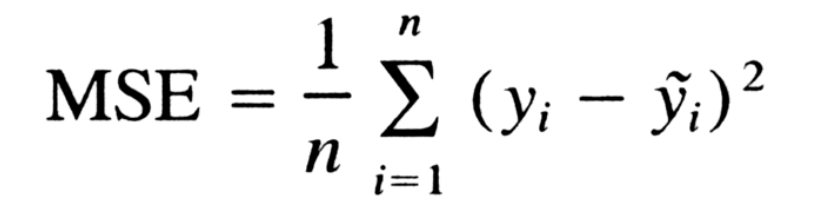

In [21]:
#Finding Pairs through minimal MSE between stocks. These stocks will surely be highly constrained to a narrow band and hence can be used for the further implementation
#Calculated MSE between every two stocks and if the mse is less than threshold, adding them in mse_pairs
mse_training_matrix=mse(scaled_stocks_data_training)
print(mse_training_matrix.shape)

threshold=0.004

a=np.where(mse_training_matrix<threshold,mse_training_matrix,-1)
arr_x=[]
arr_y=[]
for i in range(a.shape[0]):
  for j in range(i+1, a.shape[1]):
    if (a[i][j]!=-1):
      arr_x.append(i)
      arr_y.append(j)
arr_x=np.array(arr_x)
mse_pairs=[[i, j] for i, j in zip(arr_x, arr_y)]
print('Total number of MSE pairs = ',len(mse_pairs))

(346, 346)
Total number of MSE pairs =  20


## Cointegration Pairs

Cointegration tests identify scenarios where two or more non-stationary time series are integrated together in a way that they cannot deviate from equilibrium in the long term. The tests are used to identify the degree of sensitivity of two variables to the same average price over a specified period of time. Here we are finding the cointegration pairs using Augmented engle-granger two-step cointegration test.

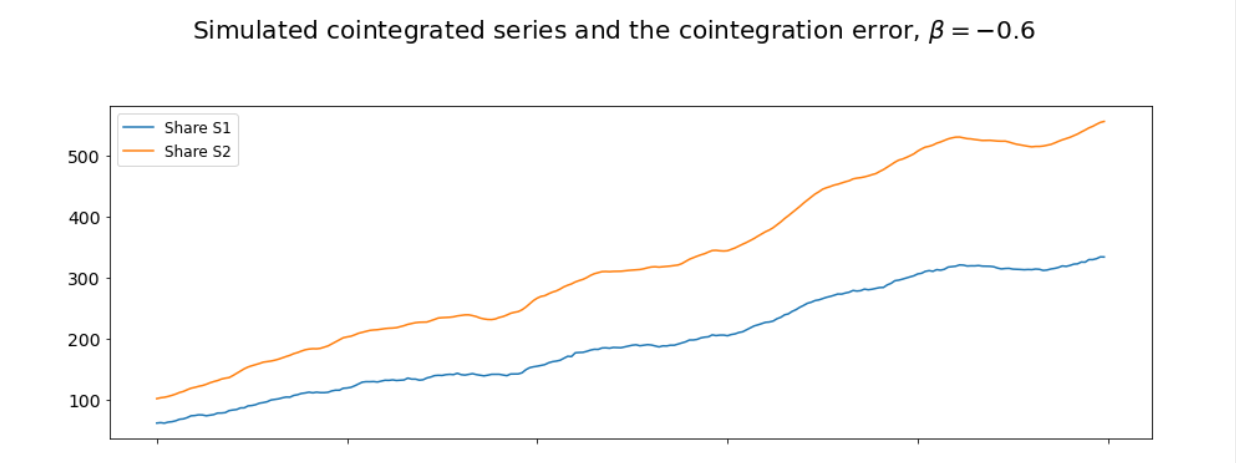


### Engle Granger Test

The idea of Engle-Granger test is simple. We perform a linear regression between the two asset prices and check if the residual is stationary using the Augmented Dick-Fuller (ADF) test. If the residual is stationary, then the two asset prices are cointegrated. The cointegration coefficient is obtained as the coefficient of the regressor.

An immediate problem is in front of us. Which asset should we choose as the dependent variable? A feasible heuristic is that we run the linear regression twice using each asset as the dependent variable, respectively. The final \beta would be the combination that yields a more significant ADF test.

##### For furthur information about cointegration pairs, https://hudsonthames.org/an-introduction-to-cointegration/ can be referred

In [22]:
# Finding cointegration pairs 
import statsmodels.tsa.stattools as smts
import statsmodels.api as sm

"""
Here non_stationary_cutoff is used to compare the p value obtained from Augmented Dickey Fuller test to test
whether the time series is stationary or not. Similarly coint_cutoff is used to check whether two time series 
are cointegrated or not. If p obtained from Augmented Engle- Granger two step cointegration test is less than cutoff, 
the time series are highly correlated
"""



def cointegration_pairs(df, non_stationary_cutoff = 0.05, coint_cutoff = 0.05, intercept = False, sig_level = 0.01):

    #checking if our data is already in np array
    if (isinstance(df, np.ndarray) == False):
        df = df.values

    #Finding Non Stationary Pairs
    non_stationary_stocks = []
    stationary_stocks = []
    for i in range(df.shape[1]):
        a = np.ravel(df[:,i])
        if smts.adfuller(a)[1] >= non_stationary_cutoff: #Applying Augmented Dickey Fuller Test to find stationary and non stationary series
            non_stationary_stocks.append(i)
        else:
            stationary_stocks.append(i)

    print('Total number of non stationary series are = ', len(non_stationary_stocks))
##    print(non_stationary_stocks)
    print('Total number of stationary series are = ', len(stationary_stocks))
##    print(stationary_stocks)

    #Finding cointegrated pairs
    coint_pairs = []
    pvalues = []
    for i in range(len(non_stationary_stocks)):
        for j in range(i+1, len(non_stationary_stocks)):
            if not intercept:
                a = np.ravel(df[:,non_stationary_stocks[i]])
                b = np.ravel(df[:,non_stationary_stocks[j]])
                k = smts.coint(a,b)[1]     
                if k < coint_cutoff:
                    coint_pairs.append([non_stationary_stocks[i], non_stationary_stocks[j]])
                    pvalues.append(k)

            else:
                Y = np.ravel(df[:,non_stationary_stocks[i]])
                X = np.ravel(df[:,non_stationary_stocks[j]])
                X = sm.add_constant(X)

                model = sm.OLS(Y, X)
                results = model.fit()
                intercept, slope = results.params

                p_value = smts.adfuller(results.resid)[1]

                if p_value < sig_level and slope > 0:
                    coint_pairs.append([non_stationary_stocks[i], non_stationary_stocks[j]])
                    pvalues.append(p_value)

    coint_pairs = np.array(coint_pairs)
    pvalues = np.array(pvalues)

    argsort = np.argsort(pvalues)
    sorted_coint_pairs = []
    sorted_pvalues = []
    for i in argsort:
        sorted_pvalues.append(pvalues[i])
        sorted_coint_pairs.append(coint_pairs[i])

    sorted_coint_pairs = np.array(sorted_coint_pairs)
    sorted_pvalues = np.values = np.array(sorted_pvalues)

    return sorted_coint_pairs, sorted_pvalues

In [23]:
# Applying the above function to find cointegration pairs

coint_pairs, coint_pvalues = cointegration_pairs(scaled_stocks_data_training, 0.04, 0.01)
print(len(coint_pairs))
print(coint_pairs)

Total number of non stationary series are =  343
Total number of stationary series are =  3
561
[[ 56  62]
 [ 97 105]
 [ 21 215]
 ...
 [ 80 160]
 [ 45 126]
 [166 207]]


### Principle Component Analysis

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process.


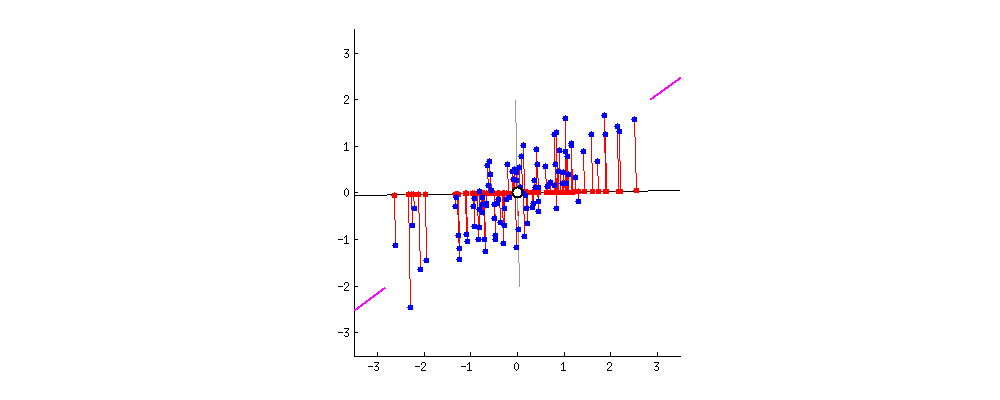

In [24]:
#Appling Principal Components Ananlysis to reduce dimentionality of the scaled training stock data

from sklearn.decomposition import PCA

pca=PCA(n_components=10)  #Reducing dimentionality of stock data at particular dates to 10
returns_PCA=pca.fit_transform(stocks_data_training.values.transpose())

### Optics

OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm, similar to DBSCAN (Density-Based Spatial Clustering of Applications with Noise), but it can extract clusters of varying densities and shapes. It is useful for identifying clusters of different densities in large, high-dimensional datasets.

The main idea behind OPTICS is to extract the clustering structure of a dataset by identifying the density-connected points. The algorithm builds a density-based representation of the data by creating an ordered list of points called the reachability plot. Each point in the list is associated with a reachability distance, which is a measure of how easy it is to reach that point from other points in the dataset. Points with similar reachability distances are likely to be in the same cluster.

![OPTICS diagram](OPTICS.jpg)

In [25]:
from sklearn.cluster import OPTICS
# Applying OPTICS algorithm to our data transformed after PCA

optics = OPTICS(min_samples=5)
optics.fit(returns_PCA)

cluster_labels = optics.labels_ # 
num_clusters = len(set(cluster_labels)) # number of clusters
all_clusters = np.unique(cluster_labels) # all cluster labels

# put every asset under its cluster label, in a dict asset_cluster_dict:
#  key: cluster label, dtype = int
#  value: asset indicies, dtype = list (of int)
cluster_asset_dict = {label: [] for label in all_clusters}
for asset_index, label in enumerate(cluster_labels):
    cluster_asset_dict[label].append(asset_index)

# values for clusters and assets for further analysis, without the noise cluster
## all cluster labels, not including the noise cluster
clusters_no_noise = np.delete(all_clusters, np.where(all_clusters == -1))
## all clusters' size, not including the noise cluster
cluster_size_no_noise = [len(cluster_asset_dict[cluster])
                         for cluster in clusters_no_noise]
## all assets that are not in the noise cluster
available_assets = []
for cluster in clusters_no_noise:
    available_assets += cluster_asset_dict[cluster]

In [26]:
#Testing if optics worked correctly
print(cluster_size_no_noise)

all_assets = []
for cluster in all_clusters:
    all_assets += cluster_asset_dict[cluster]

print(len(all_assets))

[6, 7, 6, 9, 5, 8, 17, 5]
346


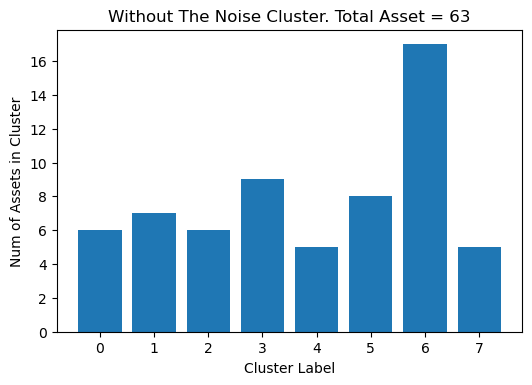

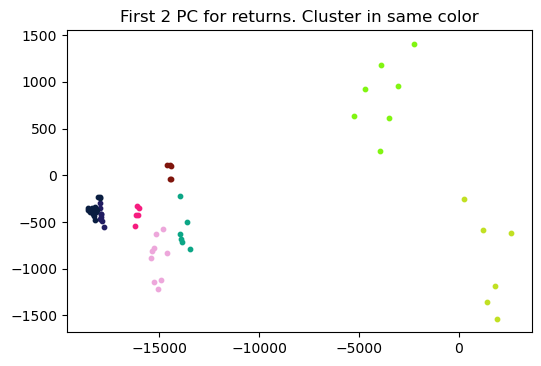

In [27]:
# bar plot
plt.figure(dpi=100)
plt.bar(clusters_no_noise, cluster_size_no_noise)
plt.xlabel('Cluster Label')
plt.ylabel('Num of Assets in Cluster')
plt.title('Without The Noise Cluster. Total Asset = {}'.format(len(available_assets)))
plt.show()

# cluster w.r.t. the two principle components
colors = {cluster: np.random.rand(3) for cluster in clusters_no_noise}
plt.figure(dpi=100)
for asset in available_assets:
    plt.scatter(returns_PCA[asset, 0], returns_PCA[asset, 1], s=10,
                color=colors[cluster_labels[asset]])

plt.title('First 2 PC for returns. Cluster in same color')
plt.show()


In [28]:
#Cointergration after Clustering

transposed_scaled_training_stock_data=scaled_stocks_data_training.T
transposed_scaled_test_stock_data=scaled_stocks_data_testing.T

cluster_training=[]
cluster_test=[]
coint_pairs_clustering=[]
coint_pvalues_clustering=[]
for i in range(num_clusters):
  cluster_training.append(transposed_scaled_training_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[i]]].T)
  cluster_test.append(transposed_scaled_test_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[i]]].T)
  if(i>0):
    print("CLUSTER ",i)
    c1,c2=cointegration_pairs(cluster_training[i], 0.05, 0.01)
    coint_pairs_clustering.append(c1)
    coint_pvalues_clustering.append(c2)

CLUSTER  1
Total number of non stationary series are =  6
Total number of stationary series are =  0
CLUSTER  2
Total number of non stationary series are =  7
Total number of stationary series are =  0
CLUSTER  3
Total number of non stationary series are =  4
Total number of stationary series are =  2
CLUSTER  4
Total number of non stationary series are =  9
Total number of stationary series are =  0
CLUSTER  5
Total number of non stationary series are =  5
Total number of stationary series are =  0
CLUSTER  6
Total number of non stationary series are =  7
Total number of stationary series are =  1
CLUSTER  7
Total number of non stationary series are =  17
Total number of stationary series are =  0
CLUSTER  8
Total number of non stationary series are =  5
Total number of stationary series are =  0


[[0 5]
 [3 5]]
80
BRIGADE
344
OFSS


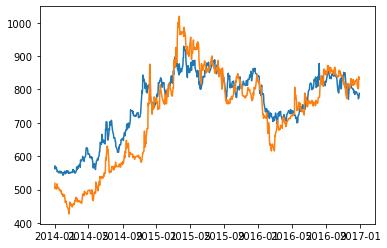

162
GMRINFRA
344
OFSS


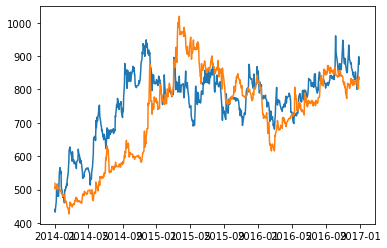

[[1 6]]
26
ALKYLAMINE
311
MAXHEALTH


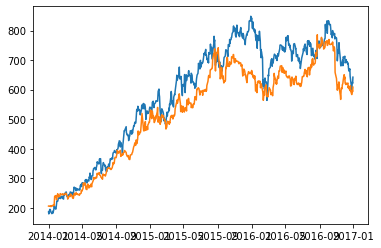

[]
[[7 8]
 [4 5]]
286
LT
298
LODHA


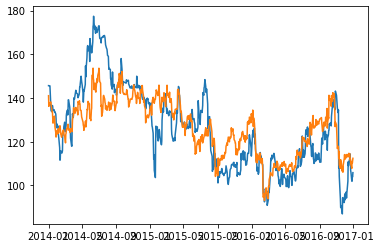

227
IBREALEST
228
INDIAMART


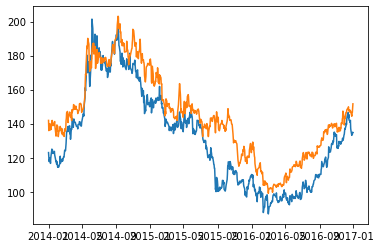

[]
[]
[[ 9 15]
 [ 9 12]
 [12 15]]
264
KPRMILL
315
METROBRAND


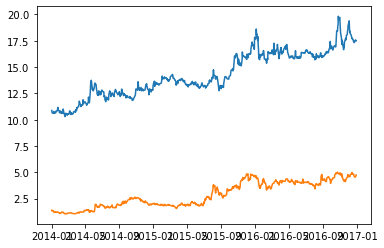

264
KPRMILL
294
LUXIND


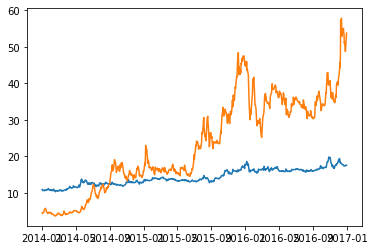

294
LUXIND
315
METROBRAND


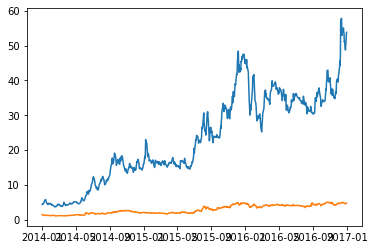

[[0 2]]
43
AUROPHARMA
188
GSFC


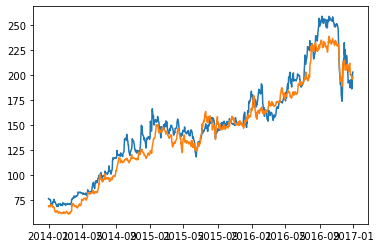

In [29]:
#Making graphs of pairs found after cointegration

index=0;
for i in coint_pairs_clustering:
  print(i)
  for j in i:
    for k in j:
      print(cluster_asset_dict[index][k])
      print(nse500['Symbol'][cluster_asset_dict[index][k]])
      plt.plot(stocks_data_training.T.iloc[cluster_asset_dict[index][k]])
    plt.show()
  index=index+1

In [30]:
#MSE after Clustering
threshold=0.005
mse_pairs_clustering=[]

for k in range(num_clusters):
  mse_training_matrix = mse(cluster_training[k])
  a=np.where(mse_training_matrix < threshold, mse_training_matrix, 4)
  arr_x=[]
  arr_y=[]
  for i in range(a.shape[0]):
    for j in range(i+1, a.shape[1]):
      if (a[i][j]!=4):
        arr_x.append(i)
        arr_y.append(j)
  arr_x=np.array(arr_x)
  mse_pairs_found=[[i, j] for i, j in zip(arr_x, arr_y)]
  mse_pairs_clustering.append(mse_pairs_found)
  if k>0:
    print('Total number of mse pairs in cluster using MSE',k,' = ',len(mse_pairs_clustering[k]))

Total number of mse pairs in cluster using MSE 1  =  0
Total number of mse pairs in cluster using MSE 2  =  0
Total number of mse pairs in cluster using MSE 3  =  0
Total number of mse pairs in cluster using MSE 4  =  0
Total number of mse pairs in cluster using MSE 5  =  0
Total number of mse pairs in cluster using MSE 6  =  0
Total number of mse pairs in cluster using MSE 7  =  0
Total number of mse pairs in cluster using MSE 8  =  1


In [31]:
# Regression based trading strategy

def regressionBacktest(training , testing , pairs , entry=2.5 , exit=1 , stoploss=100):
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score

  total_trades=0

  r = []

  for pair in pairs:  
    x = training.iloc[:,pair[0]].to_numpy()
    y = training.iloc[:,pair[1]].to_numpy()
    x = [[i] for i in x]
    regression_model = LinearRegression()

    regression_model.fit(x, y)

    y_predicted = regression_model.predict(x)
    residuals_train = y - y_predicted
    std_error = np.std(residuals_train)
    slope = regression_model.coef_
    intercept = regression_model.intercept_

    x2 = testing.iloc[:,pair[0]].to_numpy()
    y2 = testing.iloc[:,pair[1]].to_numpy()
#x, y are training series and x2, y2 are testing series

    residue2 = (y2 - (slope*x2 + intercept))
    residueAll = np.append(residuals_train, residue2)
    
    score = []
    for i in range(len(residue2)):
      score.append(residue2[i]/(np.std(residueAll[:len(residuals_train)+1+i])))        ##

    #Trading in Testing period

    positionL=0 # Long Position
    positionS=0 # Short Position
    
    returns=1 #returns are calculated in ratio 
    buyxL=0
    sellyL=0
    buyyS=0
    sellxS=0

    for i in range(len(score)-1):
      if score[i] > entry and positionL != 1:
        
        buyxL = x2[i+1]
        sellyL = y2[i+1]

        
        positionL=positionL+1

      elif (score[i] < exit or score[i] > stoploss) and positionL == 1:
        
        returns = returns*(1+(slope * (x2[i+1] - buyxL) + sellyL - y2[i+1])/(slope*buyxL + sellyL))

        
        positionL=positionL-1

      if score[i] < -1*entry and positionS != 1:
        
        buyyS = y2[i+1]
        sellxS = x2[i+1]

        
        positionS=positionS+1

      elif (score[i] > -1*exit or score[i] < -1*stoploss) and positionS == 1:
        
        returns = returns * (1+(slope*(sellxS - x2[i+1]) + y2[i+1] - buyyS)/(slope*sellxS + buyyS))
        positionS=positionS-1   

    r.append(returns)

  ## w/l ratio
  w = 0
  l = 0
  for ret in r:                   
    if(1-ret>0):
      w += 1
    elif (1-ret<0):
      l += 1
  if(l!=0):
    wl = w/l
  else:   #only wins no losses!
    wl = w 

  ### net returns
  if(len(r)>0):
    netret = 0
    for ret in r:
      netret += ret
    netr = netret/len(r)-1
  else:   #in case of 0 profitable trades
    netr = 0

  return netr, wl

In [33]:
# Backtesting on MSE pairs before clustering

Pairs = mse_pairs
entry = np.array([1.5])
exit = np.array([0.3])

s=0.0

rets = []
wls = []
#r, wl = regressionBacktest(training_stock_dataframe, testing_stock_dataframe, Pairs[2])

arr = []
arr_wl = []
arr1 = []
arr1_wl = []
for p in Pairs:
    r, wl = regressionBacktest(stocks_data_training, stocks_data_testing, [p], entry=entry, exit=exit)
    arr1.append(r)
    arr1_wl.append(wls)
arr.append(arr1)
arr_wl.append(arr1_wl)
rets.append(arr)
wls.append(arr_wl)
for i in rets[0][0]:
  s=s+i
print('Average returns = ', 100*s/len(rets[0][0]),'%')

Average returns =  [16.81175273] %


In [34]:
# Backtesting MSE Pairs post clustering

s=0.0
l=0.0

for i in range(len(mse_pairs_clustering)):
  # Pairs = mse_pairs_clustering[i][:20]  #why [:20] ?
  if not mse_pairs_clustering[i]:
    continue
  Pairs = mse_pairs_clustering[i]
  entry = np.array([1.5])
  exit = np.array([0.3])

  rets = []
  wls = []
  #r, wl = regressionBacktest(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
  for en in entry:
    arr = []
    arr_wl = []
    for ex in exit:
      arr1 = []
      arr1_wl = []
      for p in Pairs:
        r, wl = regressionBacktest(stocks_data_training, stocks_data_testing, [p], entry=en, exit=ex)
        arr1.append(r)
        arr1_wl.append(wls)
      arr.append(arr1)
      arr_wl.append(arr1_wl)
    rets.append(arr)
    wls.append(arr_wl)
  for i in rets[0][0]:
    s=s+i
    l=l+1
print('Average returns = ', 100*s/l,'%')

Average returns =  [18.02785584] %


In [35]:
# Backtesting Cointegration pairs post clustering

s=0.0
l=0.0

for i in range(len(coint_pairs_clustering)):
  # if not coint_pairs_clustering[i]:
  #   continue
  Pairs = coint_pairs_clustering[i]
  entry = np.array([1.5])
  exit = np.array([0.3])

  rets = []
  wls = []
  #r, wl = regressionBacktest(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
  for en in entry:
    arr = []
    arr_wl = []
    for ex in exit:
      arr1 = []
      arr1_wl = []
      for p in Pairs:
        r, wl = regressionBacktest(stocks_data_training, stocks_data_testing, [p], entry=en, exit=ex)
        arr1.append(r)
        arr1_wl.append(wls)
      arr.append(arr1)
      arr_wl.append(arr1_wl)
    rets.append(arr)
    wls.append(arr_wl)
  for i in rets[0][0]:
    s=s+i
    l=l+1
print('Average returns = ', 100*s/l,'%')

Average returns =  [10.06593086] %


In [36]:
# Backtesting on cointegration pairs before clustering

Pairs = coint_pairs
entry = np.array([1.5])
exit = np.array([0.3])

s=0.0

rets = []
wls = []
#r, wl = regressionBacktest(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = regressionBacktest(stocks_data_training, stocks_data_testing, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)
for i in rets[0][0]:
  s=s+i
print('Average returns = ', 100*s/len(rets[0][0]),'%')

Average returns =  [15.082763] %
